<div style="text-align: center;">

# **Algoritmia Cuantica** 
# Algoritmo de Deustch  
<font size="2">

##### Daniel Amauri Vázquez Gutiérrez
</font>


**Crea el oráculo del algoritmo de Deutsch para cada una de las opciones del algoritmo visto en clase .**


1. $ f(0) = f(1) = 0 $ 
2. $ f(0) = f(1) = 1 $ 
3. $ f(0) = 0, f(1) = 1 $ 
4. $f(0) = 1, f(1) = 0 $

<br><br>
Coloca los cálculos matemáticos con las compuertas que elegiste, junto con el circuito. No olvides medir el qubit que mostrara si la función es constante o balanceada 


In [2]:
import numpy as np 
from qiskit import QuantumCircuit, transpile, assemble 
from qiskit_aer import Aer #Aer es un modulo de Qiskit que proporciona simuladores cuanticos para ejecutarlos de manera local. 
from qiskit.visualization import plot_histogram,plot_bloch_vector

import qiskit 
print(qiskit.version.get_version_info())

1.2.0


Recordamos que para todo estado entrelazado $|x, y \rangle$ , la aplicacion de nuestro oraculo  es :  

$$U_f |x, y\rangle =|x , y \oplus f(x) \rangle $$ 

Donde $f(x)$ puede ser tanto uena funcion constante como una balanceada.  



Ahora, notamos lo siguiente : 

$$U_f |00\rangle =|0 , 0 \oplus f(0) \rangle = | 0\rangle | f(0)\rangle$$  
$$U_f |01\rangle =|0 , 1 \oplus f(0) \rangle = | 0\rangle | \overline{f(0)}\rangle$$  
$$U_f |10\rangle =|1 , 0 \oplus f(1) \rangle = | 1\rangle | f(1)\rangle$$  
$$U_f |11\rangle =|1 , 1 \oplus f(1) \rangle = | 1\rangle | \overline{f(1)}\rangle$$  

Una propiedad util apartir de lo anterior es el  ver como se comporta  la superposicion de algun Qbit $|x\rangle$  con el Qbit $|-\rangle$

\begin{equation}
U_f (|x\rangle |-\rangle)= |x\rangle ((-1)^{f(x)}|-\rangle)
\end{equation}

<font size="5"> 

**Caso 1: $f(0)=f(1)=0$** 

</font>

Entonces notamos lo siguiente : 

$$U_f |00\rangle =|0 , 0 \oplus f(0) \rangle = | 00\rangle$$  
$$U_f |01\rangle =|0 , 1 \oplus f(0) \rangle = | 01\rangle$$  
$$U_f |10\rangle =|1 , 0 \oplus f(1) \rangle = | 10\rangle$$  
$$U_f |11\rangle =|1 , 1 \oplus f(1) \rangle = | 11\rangle$$  

Con esto  sabemos ademas que , al entrar al Oraculo : 

$$ U_f(|+\rangle |-\rangle)= U_f (\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)|-\rangle)$$

Esto entontonce pasa a ser:      

$$U_f(|+\rangle |-\rangle)= \frac{1}{\sqrt{2}}(|0\rangle|- \rangle + |1\rangle|-\rangle) = |+\rangle |-\rangle$$

Por lo tanto ,$ U_f$ actua como la compuerta Identidad. Para realizar esto en Qskit, tengo entendido que lo podemos introducir directamente sin colocar nada. 

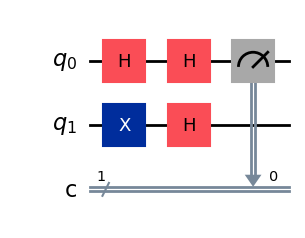

In [14]:
# Creamos un circuito con 2 qubits
qc = QuantumCircuit(2,1) #Modificamos esto para que unicamente nos de un solo resultado de qbit 


qc.x(1) 

qc.h(0)

qc.h(1)  

qc.h(0)

qc.measure(0,0)


 #Los primeros son los qbits que quiero medir y los segundos bits clasicos en los que se guardara la informacion  de estos 

qc.draw("mpl")

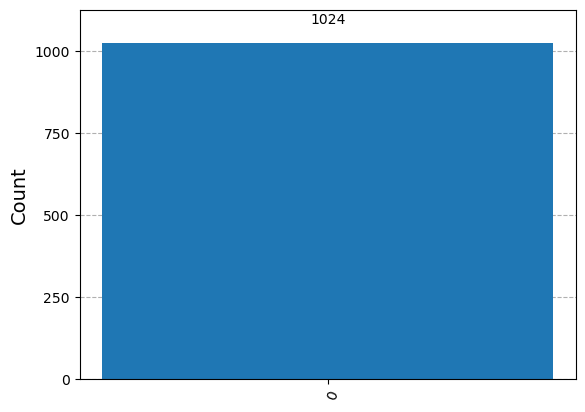

In [15]:
#------Obtencion del histograma ----------------

backend=Aer.get_backend('qasm_simulator')  
#podemos cambiar a 'qasm_simulator' , ya que 'statevector_simulator' no es compatible con mediciones clasicas

compilado=transpile(qc, backend)  
#transpile es una funcion que optimiza el circuito cuantico para que sea compatible con el backend seleccionado. 

job=backend.run(compilado, shots=1024)  
#Ejecutamos el circuito cuantico 
#Shots, especifica cuantas veces se ejecuta el circuito cuantico ( recordemos que la cuantica es probabilistica)

result=job.result() #Obtiene los resultados del lo anterior

# Graficamos el histograma de resultados
plot_histogram(result.get_counts()) 


Dandonos 0 , lo que significa  que la funcion es constante. 

<font size="5"> 

**Caso 2: $f(0)=f(1)=1$** 

</font>

Entonces notamos lo siguiente : 

$$U_f |00\rangle =|0 , 0 \oplus f(0) \rangle = | 01\rangle$$  
$$U_f |01\rangle =|0 , 1 \oplus f(0) \rangle = | 00\rangle$$  
$$U_f |10\rangle =|1 , 0 \oplus f(1) \rangle = | 11\rangle$$  
$$U_f |11\rangle =|1 , 1 \oplus f(1) \rangle = | 10\rangle$$  

Con esto  sabemos ademas que , al entrar al Oraculo : 

$$ U_f(|+\rangle |-\rangle)= U_f (\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)|-\rangle)$$

Esto entontonce pasa a ser:      

$$U_f(|+\rangle |-\rangle)= \frac{1}{\sqrt{2}}(-|0\rangle|- \rangle - |1\rangle|-\rangle) = -|+\rangle |-\rangle = (|+\rangle)(- |-\rangle) $$

Entonces notamos que en el segundo Qbit , hay que añadir  una puerta X(not)  ya que :

$$X|-\rangle =\frac{1}{\sqrt{2}}(|1\rangle -|0\rangle)=-|-\rangle

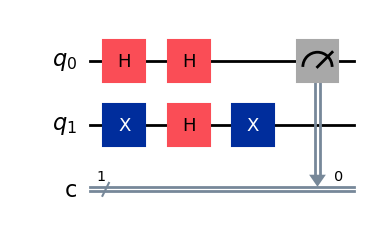

In [16]:
# Creamos un circuito con 2 qubits
qc = QuantumCircuit(2,1) 


qc.x(1)

qc.h(0)

qc.h(1)   

qc.x(1)

qc.h(0)

qc.measure(0,0)


 #Los primeros son los qbits que quiero medir y los segundos bits clasicos en los que se guardara la informacion  de estos 

qc.draw("mpl")

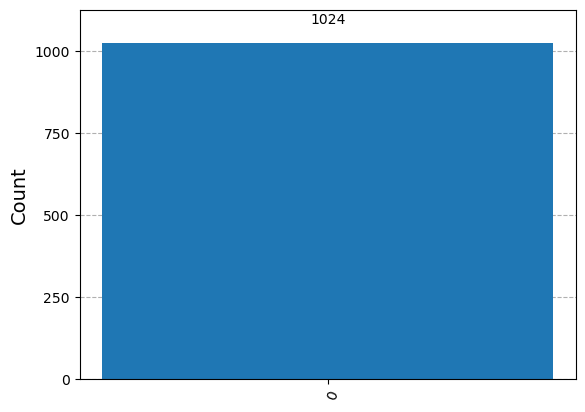

In [17]:
#------Obtencion del histograma ----------------

backend=Aer.get_backend('qasm_simulator')  
#podemos cambiar a 'qasm_simulator' , ya que 'statevector_simulator' no es compatible con mediciones clasicas

compilado=transpile(qc, backend)  
#transpile es una funcion que optimiza el circuito cuantico para que sea compatible con el backend seleccionado. 

job=backend.run(compilado, shots=1024)  
#Ejecutamos el circuito cuantico 
#Shots, especifica cuantas veces se ejecuta el circuito cuantico ( recordemos que la cuantica es probabilistica)

result=job.result() #Obtiene los resultados del lo anterior

# Graficamos el histograma de resultados
plot_histogram(result.get_counts()) 


Que igualmente deja intacto el primer qbit, que se mantiene siendo cero y por lo tanto la funcion es constante 

<font size="5"> 

**Caso 3: $f(0)=0, f(1)=1$** 

</font>

Entonces notamos lo siguiente : 

$$U_f |00\rangle =|0 , 0 \oplus f(0) \rangle = | 00\rangle$$  
$$U_f |01\rangle =|0 , 1 \oplus f(0) \rangle = | 01\rangle$$  
$$U_f |10\rangle =|1 , 0 \oplus f(1) \rangle = | 11\rangle$$  
$$U_f |11\rangle =|1 , 1 \oplus f(1) \rangle = | 10\rangle$$   

Con esto  sabemos ademas que , al entrar al Oraculo : 

$$ U_f(|+\rangle |-\rangle)= U_f (\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)|-\rangle)$$

Esto entontonce pasa a ser:      

$$U_f(|+\rangle |-\rangle)= \frac{1}{\sqrt{2}}(|0\rangle|- \rangle - |1\rangle|-\rangle) = |-\rangle |-\rangle  $$


Notamos que esto se puede conseguir mediante una compuerta CNOT de la primera a segunda.  

Para cerciorarnos , veamos como actua una compuerta CNOT  en la superposicion $|+\rangle |-\rangle$  


$$CNOT|+\rangle |-\rangle = \frac{1}{2}CNOT(|00\rangle+|10\rangle-|01\rangle-|11\rangle)=\frac{1}{2} (|00\rangle+|11\rangle-|01\rangle-|10\rangle)$$

esto es igual a : 

$$CNOT|+\rangle |-\rangle=\frac{1}{2} (|00\rangle+|11\rangle-|01\rangle-|10\rangle)=\frac{1}{2}(|0\rangle(|0\rangle-|1\rangle)-|1\rangle(|0\rangle-|1\rangle)$$ 

por lo tanto :  

$$CNOT|+\rangle |-\rangle=|-\rangle |-\rangle$$

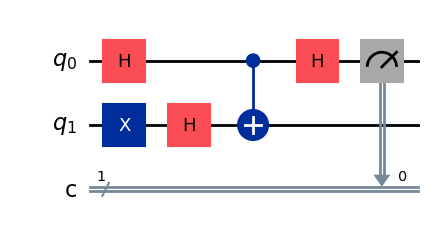

In [22]:
# Creamos un circuito con 2 qubits
qc = QuantumCircuit(2,1) #Modificamos esto para que unicamente nos de un solo resultado de qbit 


qc.x(1)

qc.h(0)

qc.h(1)   

qc.cx(0,1)

qc.h(0)

qc.measure(0,0)


 #Los primeros son los qbits que quiero medir y los segundos bits clasicos en los que se guardara la informacion  de estos 

qc.draw("mpl")

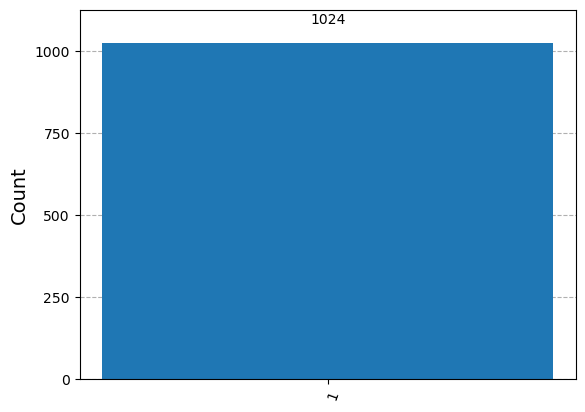

In [23]:
#------Obtencion del histograma ----------------

backend=Aer.get_backend('qasm_simulator')  
#podemos cambiar a 'qasm_simulator' , ya que 'statevector_simulator' no es compatible con mediciones clasicas

compilado=transpile(qc, backend)  
#transpile es una funcion que optimiza el circuito cuantico para que sea compatible con el backend seleccionado. 

job=backend.run(compilado, shots=1024)  
#Ejecutamos el circuito cuantico 
#Shots, especifica cuantas veces se ejecuta el circuito cuantico ( recordemos que la cuantica es probabilistica)

result=job.result() #Obtiene los resultados del lo anterior

# Graficamos el histograma de resultados
plot_histogram(result.get_counts()) 

<font size="5"> 

**Caso 4: $f(0)=1, f(1)=0$** 

</font>

Entonces notamos lo siguiente : 

$$U_f |00\rangle =|0 , 0 \oplus f(0) \rangle = | 01\rangle$$  
$$U_f |01\rangle =|0 , 1 \oplus f(0) \rangle = | 00\rangle$$  
$$U_f |10\rangle =|1 , 0 \oplus f(1) \rangle = | 10\rangle$$  
$$U_f |11\rangle =|1 , 1 \oplus f(1) \rangle = | 11\rangle$$   

Con esto  sabemos ademas que , al entrar al Oraculo : 

$$ U_f(|+\rangle |-\rangle)= U_f (\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)|-\rangle)$$

Esto entontonce pasa a ser:      

$$U_f(|+\rangle |-\rangle)= \frac{1}{\sqrt{2}}(-|0\rangle|- \rangle + |1\rangle|-\rangle) = -|-\rangle |-\rangle  $$


Por lo tanto , por lo visto en el Caso 2 y en el 3 , vemos que  Uf es la combinacion entre X en el segundo Qbit y la compuerta CNOT de la primera al segundo. 

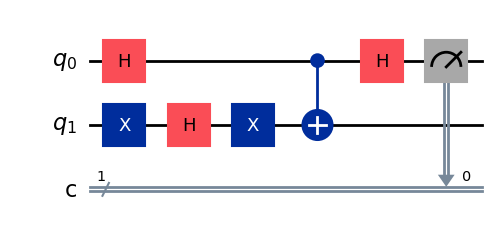

In [24]:
# Creamos un circuito con 2 qubits
qc = QuantumCircuit(2,1) #Modificamos esto para que unicamente nos de un solo resultado de qbit 


qc.x(1)

qc.h(0)

qc.h(1)    

qc.x(1)

qc.cx(0,1)

qc.h(0)

qc.measure(0,0)


 #Los primeros son los qbits que quiero medir y los segundos bits clasicos en los que se guardara la informacion  de estos 

qc.draw("mpl")

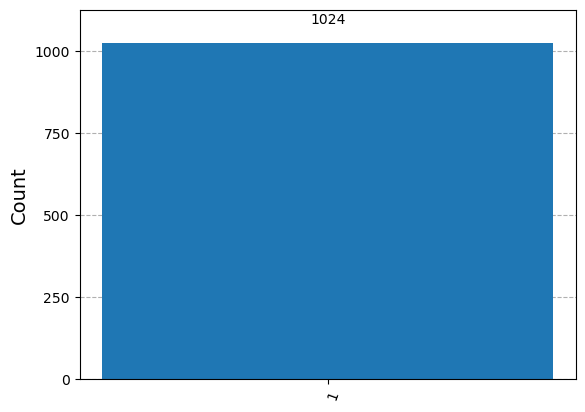

In [25]:
#------Obtencion del histograma ----------------

backend=Aer.get_backend('qasm_simulator')  
#podemos cambiar a 'qasm_simulator' , ya que 'statevector_simulator' no es compatible con mediciones clasicas

compilado=transpile(qc, backend)  
#transpile es una funcion que optimiza el circuito cuantico para que sea compatible con el backend seleccionado. 

job=backend.run(compilado, shots=1024)  
#Ejecutamos el circuito cuantico 
#Shots, especifica cuantas veces se ejecuta el circuito cuantico ( recordemos que la cuantica es probabilistica)

result=job.result() #Obtiene los resultados del lo anterior

# Graficamos el histograma de resultados
plot_histogram(result.get_counts()) 

Por lo tanto , notamos que podemos  generar  por casos este algoritmo  y que efectivamente, logramos hacer que  en cada caso , al medir el primer  Qbit , obtengamos $|0\rangle$ o $|1\rangle$ , en funcion de si es constante o balanceado. 